In [ ]:
import pandas as pd

In [ ]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt


In [ ]:
df = pd.read_excel('/content/swiggy_data_main.xlsx')

In [ ]:
df.head()

,id,res_link,res_name,rating,cusines,location,delivery_review_number,dish_category,dish_name,price,veg_status,price_for_two,price_for_one
0,1,https://www.swiggy.com/restaurants/1522-the-pu...,1522 The Pub - Residency Road,4.3,"Chinese, Coastal",Residency Road,500,Recommended,French Chicken,310,NonVeg,600,300
1,1,https://www.swiggy.com/restaurants/1522-the-pu...,1522 The Pub - Residency Road,4.3,"Chinese, Coastal",Residency Road,500,Recommended,Mutton Nalli,590,NonVeg,600,300
2,1,https://www.swiggy.com/restaurants/1522-the-pu...,1522 The Pub - Residency Road,4.3,"Chinese, Coastal",Residency Road,500,Recommended,Old Style Chilli Chicken,310,NonVeg,600,300
3,1,https://www.swiggy.com/restaurants/1522-the-pu...,1522 The Pub - Residency Road,4.3,"Chinese, Coastal",Residency Road,500,Recommended,Devils Chicken,330,NonVeg,600,300
4,1,https://www.swiggy.com/restaurants/1522-the-pu...,1522 The Pub - Residency Road,4.3,"Chinese, Coastal",Residency Road,500,Recommended,Tandoori Chicken,390,NonVeg,600,300


In [ ]:
df.shape

(107867, 13)

In [ ]:
df.duplicated().sum()

0

In [ ]:
df.isnull().sum()

id                        0
res_link                  0
res_name                  0
rating                    0
cusines                   0
location                  0
delivery_review_number    0
dish_category             0
dish_name                 0
price                     0
veg_status                0
price_for_two             0
price_for_one             0
dtype: int64

In [ ]:
df.columns

Index(['id', 'res_link', 'res_name', 'rating', 'cusines', 'location',
       'delivery_review_number', 'dish_category', 'dish_name', 'price',
       'veg_status', 'price_for_two', 'price_for_one'],
      dtype='object')

In [ ]:
df.drop(['dish_category','id','res_link','price_for_two'],axis = 1,inplace = True )

In [ ]:
df.rename(columns={'veg_status':'dish_category'}, inplace=True)

In [ ]:
df['dish_category'].value_counts()

Veg       77213
NonVeg    30654
Name: dish_category, dtype: int64

In [ ]:
numerical_col = []
categorical_col = []

for column in df.columns:
  try:
    float(df[column].mode()[0])
    numerical_col.append(column)
  except:
    categorical_col.append(column)

In [ ]:
numerical_col

['rating', 'delivery_review_number', 'price', 'price_for_one']

In [ ]:
categorical_col

['res_name', 'cusines', 'location', 'dish_name', 'dish_category']

In [ ]:
df.head(3)

,res_name,rating,cusines,location,delivery_review_number,dish_name,price,dish_category,price_for_one
0,1522 The Pub - Residency Road,4.3,"Chinese, Coastal",Residency Road,500,French Chicken,310,NonVeg,300
1,1522 The Pub - Residency Road,4.3,"Chinese, Coastal",Residency Road,500,Mutton Nalli,590,NonVeg,300
2,1522 The Pub - Residency Road,4.3,"Chinese, Coastal",Residency Road,500,Old Style Chilli Chicken,310,NonVeg,300


In [ ]:
df['cusines'].unique()

array(['Chinese, Coastal', 'Juices, Beverages', 'Fast Food, Snacks',
       'Beverages, Snacks', 'Chinese, North Indian', 'Snacks, Indian',
       'Indian, Snacks', 'South Indian, North Indian', 'Biryani, Indian',
       'Mughlai, North Indian', 'Indian', 'Indian, Chaat',
       'Biryani, South Indian', 'Beverages', 'Chinese, Biryani',
       'North Indian, Snacks', 'Chinese, Indian', 'Arabian, Tandoor',
       'Arabian', 'Biryani, Mughlai', 'Kebabs, Indian', 'Bakery, Snacks',
       'Indian, Mughlai', 'Biryani, North Indian', 'Biryani', 'Desserts',
       'Chinese, Tibetan', 'South Indian, Snacks', 'South Indian',
       'Biryani, Kebabs', 'Bakery, Desserts', 'Ice Cream',
       'North Indian, Beverages', 'North Indian', 'Biryani, Andhra',
       'Sweets, Chaat', 'Sweets, North Indian', 'North Indian, Chinese',
       'Andhra, Biryani', 'Andhra, Chettinad', 'Biryani, Chinese',
       'Chettinad, Thalis', 'Fast Food, Burgers', 'North Indian, Punjabi',
       'Punjabi, North Indian', 'C

In [ ]:
drop_cusines=['Juices', 'Fast Food', 'Beverages', 'Snacks','Kebabs', 'Bakery','Rolls & Wraps',
              'Desserts','Waffle','Biryani','Combo','Grill','Barbecue', 'Home Food','Ice Cream Cakes'
       'Pastas','Ice Cream', 'Sweets','Chaat', 'Burgers','Healthy Food', 'Paan', 'Tex-Mex', 'Sushi'
              'Pizzas', 'Cafe','Tandoor','Thalis', 'Salads', 'Seafood', 'Street Food','Cakes and Pastries']

In [ ]:
def temp(val):
  z = val.split(',')
  if len(z)==2:
    return z[0]
  else:
    return val

In [ ]:
df['cusines'] = df['cusines'].apply(temp)

In [ ]:
for cuisine_to_drop in drop_cuisines:
    df['cusines'] = df['cusines'].str.replace(cuisine_to_drop, '', regex=True)

In [ ]:
df['cusines'].unique()

array(['Chinese', '', 'Indian', 'South Indian', 'Mughlai', 'North Indian',
       'Arabian', 'Andhra', 'Chettinad', 'Punjabi', 'Continental',
       'Asian', 'Assamese', 'Japanese', 'Lebanese', 'Bengali', 'Italian',
       'American', 'Mexican', 'Maharashtrian', 'European',
       'Middle Eastern', 'Coastal', 'Mangalorean', 'Mediterranean',
       'Kerala', 'Pan-Asian', 'Rajasthani', 'Turkish', 'Portuguese',
       'Thai', 'Italian-American', 'Parsi', 'Gujarati', 'Jain', 'Tibetan'],
      dtype=object)

In [ ]:
df['cusines']=df['cusines'].replace('','Unkonwn')

In [ ]:
df.columns

Index(['res_name', 'rating', 'cusines', 'location', 'delivery_review_number',
       'dish_name', 'price', 'dish_category', 'price_for_one'],
      dtype='object')

In [ ]:
numerical_col = []
categorical_col = []

for column in df.columns:
  try:
    float(df[column].mode()[0])
    numerical_col.append(column)
  except:
    categorical_col.append(column)

In [ ]:
for column in categorical_col :
  print(column)
  print(df[column].sort_values().unique())
  print(df[column].nunique())
  print()


res_name
['1522 The Pub - Residency Road' '1992 Chats Space' '34 Chowringhee Lane'
 ... 'cheesy crazy cafe' 'kolkata King' 'vaibhav biriyani']
1390

cusines
['American' 'Andhra' 'Arabian' 'Asian' 'Assamese' 'Bengali' 'Chettinad'
 'Chinese' 'Coastal' 'Continental' 'European' 'Gujarati' 'Indian'
 'Italian' 'Italian-American' 'Jain' 'Japanese' 'Kerala' 'Lebanese'
 'Maharashtrian' 'Mangalorean' 'Mediterranean' 'Mexican' 'Middle Eastern'
 'Mughlai' 'North Indian' 'Pan-Asian' 'Parsi' 'Portuguese' 'Punjabi'
 'Rajasthani' 'South Indian' 'Thai' 'Tibetan' 'Turkish' 'Unkonwn']
36

location
['04th block' 'AUSTIN TOWN' 'Adugodi' 'Ashok Nagar' 'Audgodi'
 'Austin Town' 'Azad Nagar' 'BASAVANAGUDI' 'BRIGADE ROAD' 'BTM'
 'BTM Layout' 'BTM layout' 'Banashankari' 'Bannerghatta Main Road'
 'Basavanagudi' 'Basavangudi' 'Basaveshwar Nagar' 'Basaveshwara Nagar'
 'Basaveshwaranagar' 'Bhawani nagar' 'Binnipete' 'Brigade Rd'
 'Brigade Road' 'Btm' 'Btm Layout' 'Bull Temple Road' 'Central Bangalore'
 'Chamarajpet'

In [ ]:
df1 = df.copy()  # Create a copy of the original DataFrame

for column in categorical_col:
    if df[column].nunique() >= 40:
        df1 = df1.drop(column, axis=1)

In [ ]:
x = df1.drop('price_for_one',axis=1)
y = df1['price_for_one']

In [ ]:
df.columns

Index(['res_name', 'rating', 'cusines', 'location', 'delivery_review_number',
       'dish_name', 'price', 'dish_category', 'price_for_one'],
      dtype='object')

In [ ]:
df1.columns

Index(['rating', 'cusines', 'delivery_review_number', 'price', 'dish_category',
       'price_for_one'],
      dtype='object')

In [ ]:
df1.dtypes

rating                    float64
cusines                    object
delivery_review_number      int64
price                       int64
dish_category              object
price_for_one               int64
dtype: object

<ipython-input-503-2d3646dd07cf>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(df.corr(),annot = True)


<Axes: >

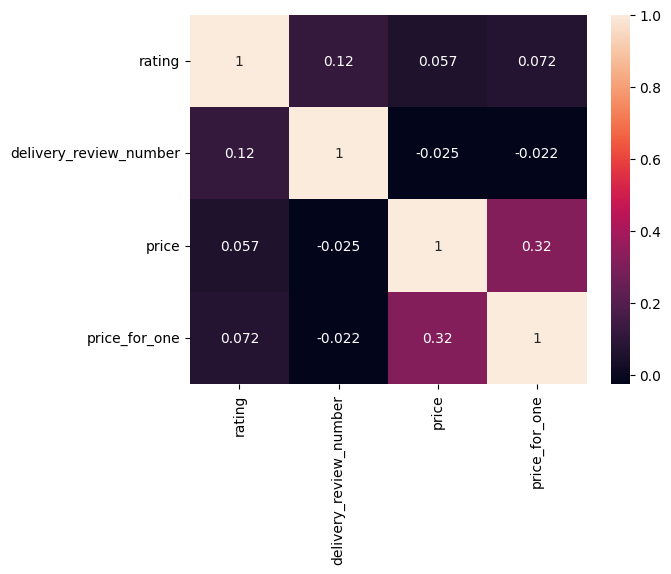

In [ ]:

sns.heatmap(df.corr(),annot = True)

In [ ]:
from  sklearn.preprocessing import StandardScaler
sc = StandardScaler()

In [ ]:
for i in df1:
  if (df1[i].dtypes !='O') and i != 'price_for_one':
    df1[i] = sc.fit_transform(df1[[i]])

In [ ]:
df1

,rating,cusines,delivery_review_number,price,dish_category,price_for_one
0,0.431623,Chinese,-0.394081,0.417502,NonVeg,300
1,0.431623,Chinese,-0.394081,1.721655,NonVeg,300
2,0.431623,Chinese,-0.394081,0.417502,NonVeg,300
3,0.431623,Chinese,-0.394081,0.510656,NonVeg,300
4,0.431623,Chinese,-0.394081,0.790117,NonVeg,300
...,...,...,...,...,...,...
107862,0.431623,Unkonwn,-0.539043,1.297805,Veg,200
107863,0.431623,Unkonwn,-0.539043,0.138040,Veg,200
107864,0.431623,Unkonwn,-0.539043,2.229343,Veg,200
107865,0.431623,Unkonwn,-0.539043,-0.420882,Veg,200


In [ ]:
x = pd.get_dummies(df1, columns=['dish_category','cusines'], drop_first=True)

In [ ]:
x

,rating,delivery_review_number,price,price_for_one,dish_category_Veg,cusines_Andhra,cusines_Arabian,cusines_Asian,cusines_Assamese,cusines_Bengali,...,cusines_Pan-Asian,cusines_Parsi,cusines_Portuguese,cusines_Punjabi,cusines_Rajasthani,cusines_South Indian,cusines_Thai,cusines_Tibetan,cusines_Turkish,cusines_Unkonwn
0,0.431623,-0.394081,0.417502,300,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0.431623,-0.394081,1.721655,300,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0.431623,-0.394081,0.417502,300,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0.431623,-0.394081,0.510656,300,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0.431623,-0.394081,0.790117,300,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
107862,0.431623,-0.539043,1.297805,200,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
107863,0.431623,-0.539043,0.138040,200,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
107864,0.431623,-0.539043,2.229343,200,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
107865,0.431623,-0.539043,-0.420882,200,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1


In [ ]:
x.shape

(107867, 40)

In [ ]:
from sklearn.decomposition import PCA

In [ ]:
pca = PCA(n_components=40)

In [ ]:
pca

PCA(n_components=40)

In [ ]:
pca1 = pca.fit_transform(x)

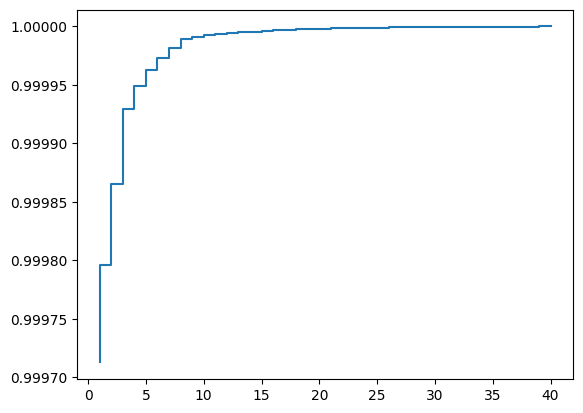

In [ ]:
plt.step(list(range(1,41)),np.cumsum(pca.explained_variance_ratio_),where = 'pre')

In [ ]:
pca2 = PCA(n_components=1)

In [ ]:
pca2.fit(x)

PCA(n_components=1)

In [ ]:
x_ =pca2.transform(x)

In [ ]:
x_ = pd.DataFrame(x_)

In [ ]:
x_

,0
0,115.604015
1,115.607578
2,115.604015
3,115.604269
4,115.605033
...,...
107862,15.605567
107863,15.602398
107864,15.608112
107865,15.600871


In [ ]:
from sklearn.linear_model import LinearRegression

from sklearn.metrics import r2_score
from sklearn import metrics



In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
x_train, x_test, y_train, y_test = train_test_split(x_,y, test_size=0.2, random_state=10)

In [ ]:
lr = LinearRegression()

In [ ]:
lr.fit(x_train, y_train)

LinearRegression()

In [ ]:
y_pred = lr.predict(x_test)


In [ ]:
y_test

6641      200
66079     100
34921     100
100104    150
94103     150
         ... 
94042     150
25472     300
91383     150
68594     250
15156     350
Name: price_for_one, Length: 21574, dtype: int64

In [ ]:
y_pred

array([199.99809708,  99.99984179,  99.99854416, ..., 149.9980349 ,
       249.99991678, 349.99985158])

In [ ]:
r2_score(y_test,y_pred)

0.9999999994056482

###Logistic Regression


In [ ]:
df

,res_name,rating,cusines,location,delivery_review_number,dish_name,price,dish_category,price_for_one
0,1522 The Pub - Residency Road,4.3,Chinese,Residency Road,500,French Chicken,310,NonVeg,300
1,1522 The Pub - Residency Road,4.3,Chinese,Residency Road,500,Mutton Nalli,590,NonVeg,300
2,1522 The Pub - Residency Road,4.3,Chinese,Residency Road,500,Old Style Chilli Chicken,310,NonVeg,300
3,1522 The Pub - Residency Road,4.3,Chinese,Residency Road,500,Devils Chicken,330,NonVeg,300
4,1522 The Pub - Residency Road,4.3,Chinese,Residency Road,500,Tandoori Chicken,390,NonVeg,300
...,...,...,...,...,...,...,...,...,...
107862,Zoroy Luxury Chocolates,4.3,Unkonwn,Church Street,50,Cacao Almond Butter 200 Gms,499,Veg,200
107863,Zoroy Luxury Chocolates,4.3,Unkonwn,Church Street,50,Honey 250 Gms,250,Veg,200
107864,Zoroy Luxury Chocolates,4.3,Unkonwn,Church Street,50,5 Belgian Bars Set (125gms),699,Veg,200
107865,Zoroy Luxury Chocolates,4.3,Unkonwn,Church Street,50,Classic Butter Croissant,130,Veg,200


In [ ]:
df2= df.copy()  # Create a copy of the original DataFrame

for column in categorical_col:
    if df[column].nunique() >= 40:
        df2 = df2.drop(column, axis=1)

In [ ]:
numerical_co = []
categorical_co = []

for column in df2.columns:
  try:
    float(df2[column].mode()[0])
    numerical_co.append(column)
  except:
    categorical_co.append(column)

In [ ]:
numerical_co

['rating', 'delivery_review_number', 'price', 'price_for_one']

In [ ]:
categorical_co

['cusines', 'dish_category']

In [ ]:
from  sklearn.preprocessing import StandardScaler
sc = StandardScaler()

In [ ]:
for i in df2:
  if (df2[i].dtypes !='O'):
    df2[i] = sc.fit_transform(df2[[i]])

In [ ]:
df2

,rating,cusines,delivery_review_number,price,price_for_one,dish_category_Veg
0,0.431623,7,-0.394081,0.417502,0.995865,0
1,0.431623,7,-0.394081,1.721655,0.995865,0
2,0.431623,7,-0.394081,0.417502,0.995865,0
3,0.431623,7,-0.394081,0.510656,0.995865,0
4,0.431623,7,-0.394081,0.790117,0.995865,0
...,...,...,...,...,...,...
107862,0.431623,35,-0.539043,1.297805,0.134407,1
107863,0.431623,35,-0.539043,0.138040,0.134407,1
107864,0.431623,35,-0.539043,2.229343,0.134407,1
107865,0.431623,35,-0.539043,-0.420882,0.134407,1


In [ ]:
from sklearn.preprocessing import LabelEncoder

# Create a label encoder
label_encoder = LabelEncoder()

# Fit and transform the 'cuisines' column in your DataFrame
df2['cusines'] = label_encoder.fit_transform(df2['cusines'])

In [ ]:
df2 = pd.get_dummies(df2, columns=['dish_category'], drop_first=True)

In [ ]:
x = df2.drop('cusines',axis =1)

In [ ]:
y = df2['cusines']

In [ ]:
from sklearn.linear_model import LogisticRegression
lg = LogisticRegression()

In [ ]:
x_train, x_test, y_train, y_test = train_test_split(x,y, test_size=0.2, random_state= 44)

In [ ]:
lg.fit(x_train,y_train)

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [ ]:
y_pred = lg.predict(x_test)

In [ ]:
print(metrics.classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.50      0.02      0.05       289
           1       0.40      0.01      0.02       225
           2       0.00      0.00      0.00       231
           3       0.39      0.28      0.33       244
           4       0.00      0.00      0.00        27
           5       0.00      0.00      0.00        90
           6       0.00      0.00      0.00        17
           7       0.28      0.05      0.08      2850
           8       0.00      0.00      0.00        94
           9       1.00      0.00      0.01       310
          10       0.00      0.00      0.00        30
          11       0.00      0.00      0.00        25
          12       0.20      0.04      0.06      2246
          13       0.26      0.09      0.13       259
          14       0.00      0.00      0.00        26
          15       0.00      0.00      0.00         7
          16       0.15      0.19      0.17       177
          17       0.33    

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [ ]:

metrics.confusion_matrix(y_test,y_pred)

In [ ]:

metrics.accuracy_score(y_test,y_pred)

0.3857884490590526

In [ ]:
# from sklearn.linear_model import LogisticRegression
# from sklearn.metrics import confusion_matrix,classification_report

# thresholds = [0.3,0.4,0.5,0.6,0.7,0.8]
# models = []
# for threshold in thresholds:
#   lg = LogisticRegression()
#   lg.fit(x_train,y_train)
#   y_prob = lg.predict_proba(x_test)[:,1]
#   y_pred = (y_prob > threshold).astype(int)
#   models.append((lg,threshold,y_pred))

#   cm = confusion_matrix(y_test,y_pred)
#   cr = classification_report(y_test,y_pred)
#   print(f"Threshold : {threshold}")
#   print('Confusion Matrix:')
#   print(cm)
#   print('Classification Report:')
#   print(cr)

### Random Forest Classifier


In [ ]:
df['location'].nunique()

130

In [ ]:
df3= df.copy()  # Create a copy of the original DataFrame

for column in categorical_col:
    if df[column].nunique() >= 135:
        df3 = df3.drop(column, axis=1)

In [ ]:
df3.drop('cusines',axis = 1,inplace = True)

In [ ]:
numerical_column = []
categorical_column = []

for column in df3.columns:
  try:
    float(df3[column].mode()[0])
    numerical_column.append(column)
  except:
    categorical_column.append(column)

In [ ]:
from  sklearn.preprocessing import StandardScaler
sc = StandardScaler()

In [ ]:
for i in df3:
  if (df3[i].dtypes !='O'):
    df3[i] = sc.fit_transform(df3[[i]])

In [ ]:
df3

,rating,location,delivery_review_number,price,dish_category,price_for_one
0,0.431623,Residency Road,-0.394081,0.417502,NonVeg,0.995865
1,0.431623,Residency Road,-0.394081,1.721655,NonVeg,0.995865
2,0.431623,Residency Road,-0.394081,0.417502,NonVeg,0.995865
3,0.431623,Residency Road,-0.394081,0.510656,NonVeg,0.995865
4,0.431623,Residency Road,-0.394081,0.790117,NonVeg,0.995865
...,...,...,...,...,...,...
107862,0.431623,Church Street,-0.539043,1.297805,Veg,0.134407
107863,0.431623,Church Street,-0.539043,0.138040,Veg,0.134407
107864,0.431623,Church Street,-0.539043,2.229343,Veg,0.134407
107865,0.431623,Church Street,-0.539043,-0.420882,Veg,0.134407


In [ ]:
from sklearn.preprocessing import LabelEncoder

# Create a label encoder
label_encoder = LabelEncoder()

# Fit and transform the 'cuisines' column in your DataFrame
df3['location'] = label_encoder.fit_transform(df3['location'])

In [ ]:
df3 = pd.get_dummies(df3, columns=['dish_category'], drop_first=True)

In [ ]:
df3

In [ ]:
x=df3.drop('location',axis = 1)

In [ ]:
y= df3['location']

In [ ]:
x_train, x_test, y_train, y_test = train_test_split(x,y, test_size=0.2, random_state= 55)

In [ ]:
from sklearn.ensemble import RandomForestClassifier
rc = RandomForestClassifier()

In [ ]:
rc.fit(x_train,y_train)

RandomForestClassifier()

In [ ]:
y_pred = rc.predict(x_test)

In [ ]:

print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        37
           1       0.75      1.00      0.86         3
           2       0.93      0.98      0.96       132
           3       0.92      0.89      0.90       720
           4       0.78      0.54      0.64        13
           5       1.00      0.20      0.33         5
           6       0.75      1.00      0.86         3
           7       1.00      0.96      0.98        25
           8       0.71      0.75      0.73        20
           9       0.84      0.81      0.82       132
          10       0.94      0.90      0.92       261
          11       0.84      0.97      0.90        74
          12       0.88      0.89      0.89      2039
          13       1.00      1.00      1.00        18
          14       0.84      0.88      0.86      2552
          15       0.79      0.88      0.83        74
          16       0.83      0.77      0.80        13
          17       0.88    

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [ ]:
metrics.accuracy_score(y_test,y_pred)

0.8762399184203208